# <font color=red>Regression - Ev fiyatlari tahmini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("kc_house_data.csv")

### EDA - Exploratory Data Analysis

In [3]:
df.head()
#ilk 5 satiri gösterir

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()
#son 5 satiri gösterir

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
 df.corr() #Pearson correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [8]:
df.shape #shape is an attribute

(21613, 21)

In [9]:
# Eigen Value, Eigen Vector - Öz Degerler ve Öz Vektörler.

In [10]:
import seaborn as sns

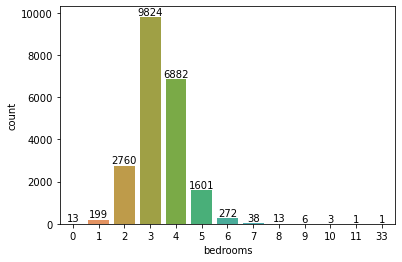

In [11]:
ax=sns.countplot(x=df["bedrooms"]);
ax.bar_label(ax.containers[0]);

In [12]:
df=df[df["bedrooms"]<11]

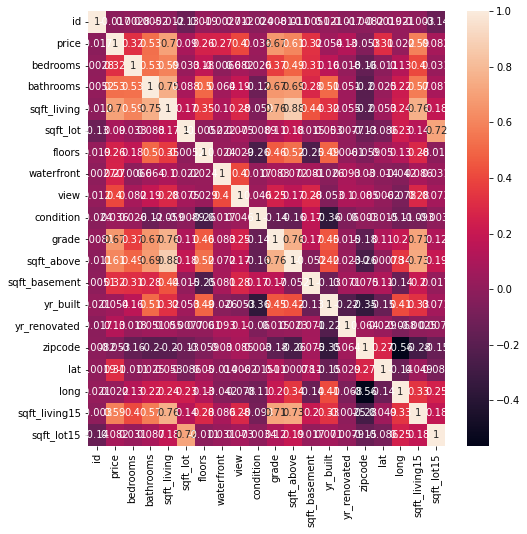

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [14]:
abs(df.corr()["price"].sort_values(ascending=False))
    
# Korelasyon cesitleri = Pearson, Spearman, Kendall 
# abs(df.corr(method='spearman')["Price"].sort_values(ascending=False))
# abs(df.corr(method='kendall')["Price"].sort_values(ascending=False))

price            1.000000
sqft_living      0.702066
grade            0.667451
sqft_above       0.605601
sqft_living15    0.585412
bathrooms        0.525166
view             0.397299
sqft_basement    0.323817
bedrooms         0.315983
lat              0.306998
waterfront       0.266371
floors           0.256818
yr_renovated     0.126515
sqft_lot         0.089663
sqft_lot15       0.082451
yr_built         0.054022
condition        0.036335
long             0.021635
id               0.016756
zipcode          0.053208
Name: price, dtype: float64

 ## Feature Engineering

In [15]:
##sns.pairplot(df);
#burada bütün sutunlarin diger sutunlara göre degisimini grafiklerle gösterdik

In [16]:
df["zipcode"]=df["zipcode"].astype("object")

In [17]:
df["age"]=2022-df["yr_built"]
df["renovated"]=2022-df["yr_renovated"]

In [18]:
df["sqft_living"]=df["sqft_living"]**2
df["grade"]=df["grade"]**2
df["sqft_above"]=df["sqft_above"]**2
df["sqft_living15"]=df["sqft_living15"]**2
df["bathrooms"]=df["bathrooms"]**2
df["view"]=df["view"]**2
df["sqft_basement"]=df["sqft_basement"]**2
df["bedrooms"]=df["bedrooms"]**2
df["lat"]=df["lat"]**2
df["waterfront"]=df["waterfront"]**2
df["floors"]=df["floors"]**2

df["sqft_lot"]=df["sqft_lot"]**2
df["sqft_lot15"]=df["sqft_lot15"]**2
df["condition"]=df["condition"]**2


### Modeling

In [19]:
from sklearn.model_selection import train_test_split
#Seed (random_state)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
x = df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms",
        "view","sqft_basement","bedrooms","lat","waterfront","floors","zipcode",
        "age","renovated","condition","sqft_lot","sqft_lot15"]]
# Mileage domain bilgisi
y = df[["price"]]

In [24]:
## x

In [25]:
x=pd.get_dummies(x,drop_first=True)
#sparse matrix - object to integer(?)

C:\Users\Kemal\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [26]:
## x

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
model = lr.fit(x_train,y_train)

In [29]:
tahmin = model.predict(x_test)

In [30]:
(mean_squared_error(tahmin,y_test))**0.5

166550.11213961124

In [31]:
r2_score(tahmin,y_test)

0.7846622346091253

In [32]:
from sklearn.linear_model import Ridge, Lasso
# bir kaynaga güvenmedik, ayni isi yapan 2 farkli modell
#Ridge hatalarin karesini aliyor - degeri cikarir, hatalara daha deger
#Lasso hatalarin mutlak degerini aliyor 

In [33]:
R=Ridge()
L=Lasso()

In [34]:
R.fit(x_train,y_train)

C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.15348e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [35]:
tahmin2=R.predict(x_test) ## Ridge

In [36]:
(mean_squared_error(tahmin2,y_test))**0.5

166666.48147762954

In [37]:
r2_score(tahmin2,y_test)

0.7836560824061103

In [38]:
L.fit(x_train,y_train)

C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+14, tolerance: 2.288e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [39]:
tahmin3 = L.predict(x_test) ## Lasso

In [40]:
(mean_squared_error(tahmin3,y_test))**0.5

166558.38737515116

In [41]:
r2_score(tahmin3,y_test)

0.7846079803864039

In [42]:
from sklearn.linear_model import ElasticNet
#Ridge ve Lasso nun karisimi kullaniyor

In [43]:
E=ElasticNet(l1_ratio=0.8)

In [44]:
E.fit(x_train,y_train) ## Elastic

C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.926e+12, tolerance: 2.288e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNet(l1_ratio=0.8)

In [45]:
tahmin4=E.predict(x_test)

In [46]:
r2_score(tahmin4,y_test)

0.6147241195460984

In [47]:
### hedef .80'in üzeri, 0.85'in üzerini basari sayiyoruz
### hata rmse <100000 dolar

In [ ]:
# hocam ben anca 0.75 ve 166558 a ulasabildim